In [1]:

import numpy as np
import matplotlib.pyplot as plt


# 9 GeV WIMP

In [2]:
#sensitivity

sensitivity_file = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/sensitivity.txt'

data_array = np.loadtxt(sensitivity_file, delimiter="\t", skiprows=1)
sensitivies = data_array[0]


# 1 sigma bands

lower_band = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band = sensitivies - lo_array[0]

upper_band = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
print(up_array[0])
upper_band = up_array[0] - sensitivies
print(sensitivies)
print(lower_band, upper_band)
y_err_1_sigma = np.vstack((lower_band, upper_band))

# 2 sigma bands

lower_band = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band = sensitivies - lo_array[0] 

upper_band = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band = up_array[0] - sensitivies

y_err_2_sigma = np.vstack((lower_band, upper_band))


#Header
with open(sensitivity_file, "r") as file:
    header_line = file.readline().strip()
    headers = header_line.split("\t")

print("Headers:", headers)

#Pb214 counts

background_file = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/WIMP_discovery/Background_counts/Pb214_counts.txt'

bkg_array = np.loadtxt(background_file, delimiter="\t", skiprows=1)
bkg_counts = bkg_array


1.577414755194723e-48
7.925040847074015e-49
3.2578170741369524e-49 7.849106704873217e-49
Headers: ['9 GeV', '65 GeV', '5000 GeV']


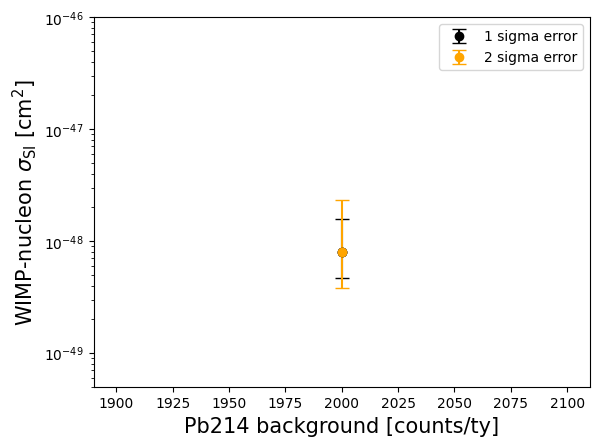

In [4]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(bkg_counts, sensitivies, color = 'black')
ax.errorbar(bkg_counts, sensitivies, yerr = y_err_1_sigma,  fmt='o', color = 'black', capsize = 5, label = '1 sigma error')
ax.errorbar(bkg_counts, sensitivies, yerr = y_err_2_sigma,  fmt='o', color = 'orange', capsize = 5, label = '2 sigma error')

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')

Then do [:,0] as opposed to [0] to index over the whole first colum when we have an array  of values for 9 GeV. Do [:,1], when we have an array for 65 GeV, etc.